# Introduction

*Lior Blum*, *Dan Caspi*

The main goal of our project is to demonstrate a music recommendation system that is based on audio features and lyrics analysis of tracks.  
The system should use machine learning techniques in order to predict which songs each user would probably like.

The main usage of such systems is in music streaming apps platforms (such as Spotify, Apple Music, Youtube Music...). 
Music recommendation systems have various benefits:
1. Increasing satisfaction, immersion and engagement of users
2. Making the platform maximum personalized
3. Making it convenient to use the platform, with no need to waste time finding new songs 
4. Get insights about users’ preferences and make data-based marketing decisions

## Recommendation system types

There are 2 most popular recommendation systems:

* **Content-based** (recommendations based on the similarity of content or, in our case — attributes of two songs)
* **Collaborative** (recommendations based on similarity of users’ preferences and using matrices with ratings for each content piece, in our case — a song)

The content-based approach relies on the similarity of particular items. While using a streaming music service, a user puts likes or dislikes on the songs, creating playlists, or defining beforehand his/her favorite songs/genres/artists. The main idea of a content-based recommendation system is to extract metadata and/or data of songs that a user loved, compare them with metadata/data of other songs in the service's library, and based on this, recommend similar songs to the user.

In turn, a collaborative system is built on the basis of users’ overlapping preferences and ratings of songs. It assumes that if user A and user B express similar preferences, similar songs can be recommended to them, meaning that if user A likes a particular song, it is likely that this song will also appeal to user B, and vice versa.

![Two most popular recommendation systems](./resources/music_recomm_filtering.png)

## Our Emphasis

Collaborative filtering is widely used, not only in music services, but in shopping, video-streaming, and social networks. Its assumption - that people who agreed in the past will agree in the future - is true in many occasions in music too. To our knowledge, all major music streaming services nowadays use some kind of collaborative filtering as part of their recommendations.
However, it has some major drawbacks (generally and specifically in music):

* **Cold Start** - For a new user, there isn't enough data to make accurate recommendations. For a new song/artist, there are not enough people that have listened to the song, so it will not be recommended.

* **Popularity Bias** - Recommendations are biased towards popularity, and limits exposure of less-popular, underrated and indie songs and artists (not only newcomers, but also "unconventional" ones).

* **Cultural Barrier** - Music is an international language. However, in this method users are almost exclusively recommended with songs of their own language and country (with only American/English as the exception). 'Similar Users' for Collaborative filtering technique primarily means users from the same region, mainly due to their initial playlists or region&language settings, which might cause users to miss songs they could've liked only because they are of foreign origin.

Therefore, we decided to emphasize on content-based filtering which helps tackling the two issues explained above.
In the music field, the 'content' which we'll use consists of:
1. **Audio features** (key, liveness, tempo, etc.)
2. **Lyrics analysis**

Recommendation system based on this kind of content does not suffer as much from cold start:
* From the user's point-of-view, as soon as he chooses a single genre or a song/artist which he loves, content-based filtering can recommend him similar songs to his choices based on their content (much faster and more accurate than trying to find similar users, with their complicated tastes, based on such little data).
* From the artist's point-of view, as soon as he/she publishes a song, its features can be analyzed and it can be recommended to users who love similar songs, even if no one else has listened to it yet.

Content-based filtering also does not discriminate unpopoular songs/artists or foreign music, since it purely relies on the essence of music - melody and lyrics. Therefore, it encourages users to broaden their horizons - musically and culturally.

# Data Collection

The data used in this project is taken from ["Spotify Million Playlist Dataset Challenge"](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge) - a continuation of a data science research challenge focused on music recommendation organized by Spotify (See [RecSys Challenge 2018](http://www.recsyschallenge.com/2018/)).

* Another music recommendation challenge that we've considered to base our work on is <https://www.kaggle.com/c/msdchallenge/overview>. However, due to its old age (2012), smaller scale and rigid data formats, the former dataset was preferred.

The project's data consists of:
1. spotify_million_playlist_dataset (the challenge dataset)
2. songs_dataset
3. audio_features_dataset
4. lyrics_corpus

## spotify_million_playlist_dataset

### The raw challenge dataset downloaded from <https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge/dataset_files>).

* 1 million playlists consisting of over 2 million unique tracks by nearly 300,000 artists. Created by US Spotify users between January 2010 and November 2017. This dataset is separated into multiple JSON files, each containing 1000 playlists. **Used for both the training set and the test set**

In [1]:
import json

# Show format of one playlist and one track
with open('data/spotify_million_playlist_dataset/mpd.slice.0-999.json') as f:
    ex_playlist = json.load(f)['playlists'][0]
    ex_playlist['tracks'] = [ex_playlist['tracks'][0]]

ex_playlist

{'name': 'Throwbacks',
 'collaborative': 'false',
 'pid': 0,
 'modified_at': 1493424000,
 'num_tracks': 52,
 'num_albums': 47,
 'num_followers': 1,
 'tracks': [{'pos': 0,
   'artist_name': 'Missy Elliott',
   'track_uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
   'artist_uri': 'spotify:artist:2wIVse2owClT7go1WT98tk',
   'track_name': 'Lose Control (feat. Ciara & Fat Man Scoop)',
   'album_uri': 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K',
   'duration_ms': 226863,
   'album_name': 'The Cookbook'}],
 'num_edits': 6,
 'duration_ms': 11532414,
 'num_artists': 37}

## songs_dataset.json 
### All songs from the playlists dataset collected with the following code:

In [ ]:
import json
import os

all_songs = {}
spotify_dataset_path = 'data/spotify_million_playlist_dataset/'

# Add all songs from a Spotify slice file (from dataset) to all_songs.json
def add_all_songs_from_file(path):
    with open(path) as f:
        data = json.load(f)
        
    for playlist in data['playlists']:
        for track in playlist['tracks']:
            track_id = track['track_uri'].partition('spotify:track:')[-1]
            artist_id = track['artist_uri'].partition('spotify:artist:')[-1]
            if track_id not in all_songs:
                all_songs[track_id] = {
                    'track_name': track['track_name'], 
                    'artist_name': track['artist_name'], 
                    'artist_id': artist_id
                }

for slice_file in os.listdir(spotify_dataset_path):
    add_all_songs_from_file(spotify_dataset_path + slice_file)
with open('data/all_songs.json', 'w') as f:
    json.dump(all_songs, f)

In [4]:
import pandas as pd

# Demonstration of the file's format
all_songs_df = pd.read_json('data/all_songs.json').T
all_songs_df.head()

,track_name,artist_name,artist_id
0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,2wIVse2owClT7go1WT98tk
6I9VzXrHxO9rA9A5euc8Ak,Toxic,Britney Spears,26dSoYclwsYLMAKD3tpOr4
0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,Beyoncé,6vWDO969PvNqNYHIOW5v0m
1AWQoqb9bSvzTjaLralEkT,Rock Your Body,Justin Timberlake,31TPClRtHm23RisEBtV3X7
1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,Shaggy,5EvFsr3kj42KNv97ZEnqij


## audio_features_dataset.json

### Various audio features collection generated out of 'songs_dataset'. 
### Retrieved from Spotify public API (<https://api.spotify.com/>).

In [ ]:
# TODO

## lyrics_corpus.json
### Lyrics collection of many of the songs from the playlists dataset. Scraped from Genius Lyrics site and public API (<https://genius.com/>).

* The songs titles were added to the lyrics, since a song's title can sometimes tell us a lot about it. 
* [Note: *The full code (lyrics_list_builder.py) also searched for missing URLs to obtain as many lyrics as possible*]

In [ ]:
import aiohttp
import asyncio
import time
import json
from lyrics_scraper import url, lyrics # based on code from https://github.com/johnwmillr/LyricsGenius
import unicodedata
import re

asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

all_urls = []
all_require_search = []
all_lyrics = {}

# Build Genius URLs dictionary

print('Building all_urls list...')
start_time = time.time()

def parse_name(name):
    s = unicodedata.normalize('NFKD', name).encode('ascii','ignore').decode('utf8')
    s = re.search(r'([^()\[\]-]*)', s).group(1).strip().replace(' ', '-').replace('&', 'and')
    return re.sub('[^a-zA-Z0-9_\-]', '', s)

with open('data/songs_dataset.json', 'r') as songs_file:
    with open('data/lyrics1-100000.json', 'r') as lyrics_file:
        all_songs = json.load(songs_file)
        all_lyrics = json.load(lyrics_file)
        assert type(all_lyrics) == dict
        assert type(all_songs) == dict
        counter = 0
        for track_id, track_data in all_songs.items():
            # Limit number of songs
            if counter >= 100000:
                break
            counter += 1
            # Don't fetch lyrics we already have
            if all_lyrics.get(track_id):
                continue
            parsed_track_name = parse_name(track_data['track_name'])
            parsed_artist_name = parse_name(track_data['artist_name'])
            if parsed_artist_name and parsed_track_name:
                all_urls.append((track_id, track_data, 
                    f'https://genius.com/{parsed_artist_name}-{parsed_track_name}-lyrics'))
                
            else:
                all_require_search.append((track_id, track_data))
            

print(f'len(all_urls) equals {len(all_urls)}')
print("--- URLs list building took %s seconds ---" % (time.time() - start_time))

# Build lyrics list with asynchronous HTTP requests to genius.com

async def get_lyrics(session, url, track_id, track_name):
    try:
        async with session.get(url, timeout=5) as resp:
            if (resp.status == 200):
                lyrics_html = await resp.text()
                return (track_id, track_name + '\n' + lyrics(lyrics_html, True))
            else:
                print(f'Received status {resp.status} for {url}') if resp.status != 404 else None
                return (track_id, None)
    except Exception as e:
        return (track_id, None)

songs_lyrics_list = []

async def add_to_lyrics_list(urls_list, songs_offsets=(0, None)):
    """ Try to retrieve lyrics from given URLs """
    global songs_lyrics_list

    async with aiohttp.ClientSession() as session:
        tasks = []

        print(f'Retrieving lyrics of songs {songs_offsets[0]}:{songs_offsets[1]}...')
        for track_id, track_data, url in urls_list[songs_offsets[0]:songs_offsets[1]]:
            tasks.append(asyncio.ensure_future(get_lyrics(session, url, track_id, track_data['track_name'])))

        songs_lyrics_list += await asyncio.gather(*tasks)
        

total_songs_num = len(all_urls)
songs_at_each_interval = 200

start_time = time.time()
print('Retrieving lyrics from URLs found in all_urls...')
for i in range(0, total_songs_num, songs_at_each_interval):
    asyncio.run(add_to_lyrics_list(all_urls, (i, i + songs_at_each_interval)))
    time.sleep(0.2)
end_time = time.time()
print("--- Lyrics retrieval took %s seconds ---" % (end_time - start_time))

for track_id, track_lyrics in songs_lyrics_list:
    if not track_lyrics:
        all_require_search.append((track_id, all_songs[track_id]))

songs_lyrics_list = [(track_id, lyrics) for (track_id, lyrics) in songs_lyrics_list if lyrics]
print(f'Retrieved lyrics of {len(songs_lyrics_list)} songs')

start_time = time.time()
file_path = 'data/lyrics_corpus.json'
with open(file_path, 'w') as f:
    all_lyrics.update({track_id: lyrics for (track_id, lyrics) in songs_lyrics_list if lyrics})
    json.dump(all_lyrics, f)
print(f"Added lyrics for {len(songs_lyrics_list)} songs to {file_path}")
print("--- Lyrics file writing took %s seconds ---" % (end_time - start_time))

* Some tracks are instrumental, and for some others lyrics were unavailable. The lyrics_Corpus only contains entries of songs with existing and obtainable lyrics. 
* Out of the 100,000 tracks which we use, we managed to obtain lyrics for about 75% of them. 

In [1]:
import json

with open('data/lyrics_corpus.json', 'r') as lyrics_file:
    all_lyrics = json.load(lyrics_file)

Before we start analyzing the lyrics, we might need to remove outliers. Outliers for our purpose are songs with lyrics too short (which probably indicate that they were not properly scraped or that they are purely instrumental), or too long (which might cause biased analysis).

In [31]:
import plotly.express as px
import pandas as pd

all_lyrics_series = pd.Series(all_lyrics)

fig = px.histogram([len(x) for x in all_lyrics_series.values], labels={'value':'lyrics length'})
fig.show()

In [38]:
from scipy.stats import zscore
import numpy as np

abs_z_scores = np.abs(zscore([len(x) for x in all_lyrics_series]))
# For our purpose, an outlier is a value that is more than 3 standard deviations from the mean
filtered_z_entries = (abs_z_scores < 3)
filtered_min_entries = [len(x) > 200 for x in all_lyrics_series]
all_lyrics_series = all_lyrics_series[filtered_z_entries & filtered_min_entries]
fig = px.histogram([len(x) for x in all_lyrics_series.values], labels={'value':'lyrics length'})
print(len(all_lyrics_series))
fig.show()

74603


## NRC Word-Emotion Association Lexicon - Emotion-Intensity-Lexicon-v1
### A large lexicon comprised of multiple lexicons (one for each emotion) of thousands of English words, their sentiment and the intensity of that sentiment (in scale of 0.0-1.0). Used for Emotion Recognition of songs' lyrics. The annotations were manually done by crowdsourcing.

In [49]:
with open('data/NRC/OneFilePerEmotion/sadness-scores.txt', 'r') as lexicon_file:
    for _ in range(3):
        print(lexicon_file.readline())

heartbreaking	0.969

mourning	0.969

tragic	0.961



# Exploratory Data Analysis

## Lyrics Analysis

Music is (usually) not just a melody, but also lyrics that tell us a story, a feeling, an idea. Lyrics can make people connect with the song, identify with it and fall in love for it. For some people (or in some genres), lyrics aren't that important and only sound matters. For others, lyrics are everything. In order to recommend songs to people, we should at least try to understand what they are saying.

Analyzing lyrics is no simple task. Unlike audio features, that are fetched as numeric features, ready to be processed, lyrics are raw texts that are filled with less-important words, slang words, punctuation and abbreviations. Songs' lyrics also contain metaphors, ironies and plenty of sarcasm. Some problems can be overcome, others not so much. Therefore, we do not aim at understanding each song's entire implicit meaning and hidden themes. We only try to get a clue of what each song is about, and about which songs are similar in that matter.

We will need to find ways to make these texts into normalized numeric features, that can be compared between different songs and clustered.

In [67]:
import nltk
import matplotlib.pyplot as plt

all_lyrics_raw = ' '.join(all_lyrics_series.values)

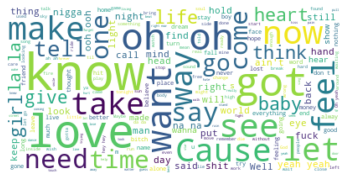

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60, background_color = 'white').generate(all_lyrics_raw)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Considered lyrics analysis techniques:

- Frequent words 
  - Might produce too many features
  - Might miss the "essence of the song"

- Emotions/Sentiments - Emotional features
  - Using some sentiment detection model on each sentence. 
    - Usually they have only three categories: positive, negative, neutral. Also, difficult to separate lyrics into full sentences.
  - Using VADER model on full songs with custom lexicon
    - This is called knowledge-based Sentiment Analysis. In order to improve it, maybe we can it can use it on several songs in order to label them, and then train a neural network with this labeled data to get deeper and more sophisticated sentiment on all songs (aka combine the knowledge based with a statistical)

Document Clustering using Topic Model:
- LDA - <https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21>
  - https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
- LSA - <https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python>:
  - https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

We will focus on two methods of lyrics analysis:
* Emotion Recognition
* Topic Modeling

### Emotion Recognition
Just as in any type of art, music is driven by emotions. Music allows writers, composers and producers to express their emotions through melodies, verses and choruses. It is also what makes listeners like/dislike certain music and feel attached to/detached from it - which is what interests us in this project.

In some songs, lyrics may give us a better clue about their tone and expressed feelings than their melodies, so we theorize that emotion recognition of lyrics can help us predict which songs each user likes.

We could not find any dataset of songs and their emotional values, and we are not planning to manually construct it by ourselves. Therefore, we'll need to find a dataset that can help us score our songs.

Several datasets were considered for this part but dismissed:
Emotions dataset for NLP (from Kaggle), Text Emotion by CrowdFlower, ISEAR, Emotion Intensity in Tweets from the WASSA 2017 and GoEmotions.
These datasets all rely on sentences structure, which is inconvenient for lyrics analysis (it is very hard and sometimes impossible to break a song into logical and correct sentences), only give a flat label for each example without a numeric intensity value, and also some of them are based on social media-typed slang, style and symbols, which is usually very different from the prosaic style of songs.

Instead, we will use the Rule-based sentiment analysis approach - score lyrics on word basis, using a given dictionary/lexicon and language rules.

The dataset we found most suitable for our purpose was the NRC Word-Emotion Association Lexicon suite, and specifically the Emotion Intensity Lexicon in it - A dictionary/lexicon of words with their emotion and intensity numeric value.

In the Emotion Recognition part, we give each song **eight** intensity scores for each of the following basic emotions found in our emotions lexicon dataset:
* anger
* anticipation
* disgust
* fear
* joy
* sadness
* surprise
* trust

These scores are given using **VADER**. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool. But we'll get to it later...

First, let's load all the lexicons:

In [355]:
# Load the required datasets

lexicons_by_emotion_path = 'data/NRC/OneFilePerEmotion/{}-scores.txt'
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

emotions_lexicons = {emot: dict() for emot in emotions}

def load_emotion_lex(emotion):
    with open(lexicons_by_emotion_path.format(emotion), 'r') as lexicon_file:
        for line in lexicon_file:
            word, intensity = line.split()
            emotions_lexicons[emotion][word] = float(intensity)

def dump_emotion_lex(emotion):
    with open(lexicons_by_emotion_path.format(emotion), 'w') as lexicon_file:
        lexicon_file.writelines([f'{word}\t{intensity}\n' for word, intensity in emotions_lexicons[emotion].items()])

for emotion in emotions:
    load_emotion_lex(emotion)

For example: the first (and strongest) entries of the 'joy' lexicon look like:

In [370]:
list(emotions_lexicons['joy'].items())[:8]

[('happiest', 0.986),
 ('happiness', 0.984),
 ('bliss', 0.971),
 ('celebrating', 0.97),
 ('jubilant', 0.969),
 ('ecstatic', 0.954),
 ('elation', 0.944),
 ('beaming', 0.938)]

We want to make sure the emotions lexicons match our lyrics data and does not miss out any important words. We can't possibly cover every single word that appears in any song, but we'll take the most common ones.

In [3]:
import nltk
from string import punctuation
import spacy.lang.en # found to be more extensive stopwords collection than nltk
import spacy.lang.fr
import spacy.lang.es
STOP_WORDS = spacy.lang.en.STOP_WORDS.union(spacy.lang.fr.STOP_WORDS, spacy.lang.es.STOP_WORDS)

all_words = nltk.tokenize.word_tokenize(all_lyrics_raw)
# Build FreqDist for all words found in lyrics, excluding stopwords and punctuation
lyrics_freq_dist = nltk.FreqDist(w.lower() for w in all_words if w.lower() not in STOP_WORDS and w not in punctuation)

Out of the (500) most common words in lyrics, we will build a list of all assumed sentimental words which are not present in the emotions lexicons. Since most words are not sentimental, we will only add words that are also present in VADER's lexicon, which contains about 7,000 sentimental words.

In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

VADER_SCALE = 4
def_vader_analyzer = SentimentIntensityAnalyzer()

nrc_path = 'data/NRC/NRC-Emotion-Intensity-Lexicon-v1.txt'

with open(nrc_path, 'r') as lexicon_file:
    lexicon = {line.partition('\t')[0] for line in lexicon_file}

# Find all sentimenatal words that are very common in lyrics (top 500) but missing in our lexicon
missing_words = []
for idx, w in enumerate(lyrics_freq_dist.most_common(500)):
    # we assume that if a word is sentimental, it should appear in VADER default lexicon
    sentiment = def_vader_analyzer.lexicon.get(w[0])
    if sentiment and w[0] not in lexicon:
        missing_words.append((w[0], idx, sentiment))

print(f'There are {len(missing_words)} missing words:\nFORMAT:(<word>, <freq>, <sentiment>)')
print(missing_words)

There are 50 missing words:
FORMAT:(<word>, <freq>, <sentiment>)
[('yeah', 5, 1.2), ('want', 10, 0.3), ('fuck', 38, -2.5), ('better', 50, 1.9), ('niggas', 53, -1.4), ('hard', 75, -0.4), ('play', 88, 1.4), ('wrong', 104, -2.1), ('hand', 117, 2.2), ('best', 122, 3.2), ('alright', 123, 1.0), ('care', 127, 2.2), ('yes', 133, 1.7), ('wish', 142, 1.7), ('ass', 147, -2.5), ('shake', 181, -0.7), ('low', 187, -1.1), ('forget', 188, -0.9), ('bitches', 190, -2.9), ('drop', 212, -1.1), ('sure', 213, 1.3), ('dead', 220, -3.3), ('fine', 228, 0.8), ('amor', 231, 3.0), ('okay', 250, 0.9), ('easy', 252, 1.9), ('cool', 276, 1.3), ('straight', 281, 0.9), ('nah', 315, -0.4), ('cut', 317, -1.1), ('sorry', 334, -0.3), ('tired', 346, -1.9), ('tears', 347, -0.9), ('woo', 356, 2.1), ('lies', 365, -1.8), ('worth', 393, 0.9), ('great', 398, 3.1), ('dick', 406, -2.3), ('nice', 418, 1.8), ('bright', 428, 1.9), ('won', 437, 2.7), ('playing', 438, 0.8), ('rich', 445, 2.6), ('stuck', 462, -1.0), ('fucked', 463, -3.4)

Not too bad. We'll manually add the important ones to the lexicon's files:  
[**Note**: *full Lemmatization and Stemming before analyzing the songs are not needed and should not be done, since most of the words' forms are already in the lexicon, with a distinct value for each different form*]

In [81]:
# Add missing words to their respective emotion group
missing_emotions_dict = {
    # If '0' intensity value is given, it is automatically calculated from VADER lexicon (/4)
    # If '<word>' intensity value is given, it is given the same intensity as in <word>
    'joy': {'better': 0, 'best': 0, 'loves': 'love', 'alright': 0, 'care': 0.75,
        'shake': 0.5, 'fine': 0, 'okay': 0, 'easy': 0.125, 'cool': 0, 'great': 0, 'nice': 0, 'bright': 0, 'won': 0, 'rich': 0.4, 'thank': 0},
    'anger': {'fuck': 0, 'wrong': 0, 'hard': 0, 'ass': 0, 'forget': 0, 'bitches': 0, 'dick': 0, 'dead': 'death',
         'cut': 0, 'fucked': 0, 'lies': 'lie', 'stuck': 0, 'trouble': 0.1},
    'sadness': {'hard': 0, 'low': 0, 'forget': 0, 'dead': 'death', 'heartbroken': 0.781, 'sorry': 0, 'tired': 0.25, 'tears': 0.6,
         'lies': 'lie', 'stuck': 0.5, 'trouble': 0.15},
    'disgust': {'ass': 0.7, 'bitches': 0, 'dead': 'death', 'cut': 0, 
         'fucked': 0, 'lies': 'lie'},
    'fear': {'hard': 0, 'forget': 0, 'dead': 'death', 'cut': 0.1, 'stuck': 0.55, 'fucked': 0.2, 'trouble': 0},
    'surprise': {'better': 0, 'dead': 'death', 'wrong': 0, 'easy': 0, 'hard': 0, 'great': 0, 'nice': 0,
         'won': 0},
    'trust': {'loves': 'love', 'care': 0, 'sure': 0, 'fine': 0, 'thank': 0, 'believe': 0.7},
    'anticipation': {'alright': 0, 'dead': 'death', 'cool': 0, 'great': 0, 'bright': 0, 'rich': 0}
}

for emotion, new_words in missing_emotions_dict.items():
     load_emotion_lex(emotion)
     for word, intensity in new_words.items():
          if type(intensity) == str:
               intensity = emotions_lexicons[emotion][intensity]
          elif intensity == 0:
               intensity = def_vader_analyzer.lexicon.get(word) / VADER_SCALE
          emotions_lexicons[emotion][word] = abs(float(intensity))
     dump_emotion_lex(emotion)

As stated before, VADER module contains a default lexicon of words and their sentiments, with which it analyzes texts and gives them intensity positive, negative and neutral scores in scale of 0.0-1.0. However, this lexicon only has binary sentiments - positive and negative (neutral means none of them), otherwise we could just use plain VADER.

Instead, we will use VADER with our emotions lexicons in the following way:
* For sadness and joy, we can combine both lexicons, since they are exact opposites, unlike other emotions. We would have a single analyzer model for both feelings: Positive equals joy and negative equals sadness. Lack of joy means sadness and vice-versa.
* For all other emotions, we would have one analyzer model for each one, using only the 'positive' value (the positive value would mean intensity of that specific emotion).

Since VADER is a generic model, by replacing its lexicon with emotions lexicons we can (hopefully) accurately identify songs' general emotions. Emotions intensities are determined not only by the presence and frequency of words from the corresponding lexicon in the text, but also by the presence of booster/negation words in their context (such as very, extremely, barely, not, etc.)

Let's copy our lexicons to the VADER's directory and create analyzers out of them.

In [114]:
import shutil
import os
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_dir = os.path.dirname(vaderSentiment.__file__)
emotions_vader_analyzers = {}

# Copy all lexicons to the VADER module's directory
for emot in emotions:
    load_emotion_lex(emot)
    # Intensities of words in our lexicon are in the range 0.0-1.0, VADER values are in range 0.0-4.0
    # So we multiply every intensity value by 4 before copying the lexicons
    emotions_lexicons[emot].update((x, y*VADER_SCALE) for x, y in emotions_lexicons[emot].items())
    if emot != 'sadness' and emot != 'joy':
        dump_emotion_lex(emot)
        emotion_lexicon_filename = os.path.basename(lexicons_by_emotion_path.format(emot))
        shutil.copyfile(lexicons_by_emotion_path.format(emot), os.path.join(vader_dir, emotion_lexicon_filename))
        emotions_vader_analyzers[emot] = SentimentIntensityAnalyzer(emotion_lexicon_filename)

# Create a combined lexicon of joy and sadness
# by adding sadness words with (-1)*intensity
for word, intensity in emotions_lexicons['sadness'].items():
    if word not in emotions_lexicons['joy'] or emotions_lexicons['joy'][word] < intensity:
        emotions_lexicons['joy'][word] = -intensity
dump_emotion_lex('joy')
emotion_lexicon_filename = os.path.basename(lexicons_by_emotion_path.format('joy'))
shutil.copyfile(lexicons_by_emotion_path.format('joy'), os.path.join(vader_dir, emotion_lexicon_filename))
emotions_vader_analyzers['joy'] = SentimentIntensityAnalyzer(emotion_lexicon_filename)

Let's take a look at two songs for example - one very joyful, and the other very sad, according to one of our analyzers.

**Note**: Whenever we analyze a song, we first of all remove all stopwords, **EXCEPT** those that are used by VADER for the analysis (negators and boosters).

In [1466]:
import spacy.lang.en
from vaderSentiment.vaderSentiment import negated, BOOSTER_DICT
import re

unnecessary_stopwords = {word for word in spacy.lang.en.STOP_WORDS if not negated([word]) and word not in BOOSTER_DICT.keys()}

def trim_text(text):
    # Deal with the popular ng->n' abbreviation and remove unnecessary words
    text_words = [re.sub(r"n'$", "ng", w) 
        for w in text.split() if re.match(r'[a-zA-Z’‘\']*', w.lower()).group() not in unnecessary_stopwords]
    return ' '.join(text_words)

def analyze_song(lyrics, emotion):
    # sadness value is the negative value of 'joy' analysis
    if emotion == 'sadness':
        emotion, sentiment = 'joy', 'neg'
    else:
        sentiment = 'pos'
    return emotions_vader_analyzers[emotion].polarity_scores(trim_text(lyrics))[sentiment]

In [88]:
import spacy.lang.en
from vaderSentiment.vaderSentiment import negated, BOOSTER_DICT
from random import sample
import re

unnecessary_stopwords = {word for word in spacy.lang.en.STOP_WORDS if not negated([word]) and word not in BOOSTER_DICT.keys()}

def trim_text(text):
    text_words = [re.sub(r"n'$", "ng", w) 
        for w in text.split() if re.match(r'[a-zA-Z’‘\']*', w.lower()).group() not in unnecessary_stopwords]
    return ' '.join(text_words)

def analyze_song(lyrics, emotion):
    # sadness value is the negative value of 'joy' analysis
    if emotion == 'sadness':
        emotion, sentiment = 'joy', 'neg'
    else:
        sentiment = 'pos'
    return emotions_vader_analyzers[emotion].polarity_scores(trim_text(lyrics))[sentiment]

def find_max_song(N, emotion):
    max_song = ('', 0.0)
    lyrics_list = sample([x for x in all_lyrics_series if len(x) > 600], N)
    for lyrics in lyrics_list:
        val = analyze_song(lyrics, emotion)
        if val > max_song[1]:
            max_song = (lyrics, val)

    # Print all analyzers results for it
    for emotion, analyzer in emotions_vader_analyzers.items():
        print(f'{emotion}: {analyzer.polarity_scores(trim_text(max_song[0]))}')

    return max_song[0]

# Find most joyful song in randomly selected 500 songs
find_max_song(500, 'joy')

anger: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
anticipation: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9851}
disgust: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fear: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
surprise: {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.9692}
trust: {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.9962}
joy: {'neg': 0.014, 'neu': 0.236, 'pos': 0.749, 'compound': 0.999}


"How Sweet It Is\nNeeded the shelter from somebody's arms\nAnd there you were\nNeeded who share my ups and downs\nAnd there you were\nWith sweet love and devotion\nDeeply touching my emotion\nI wanna stop and thank you, baby\nJust wanna to stop and thank you\nHow sweet it is to be loved by you\nHow sweet it is to be loved by you\nClose my eyes and I wonder where would I be\nWithout you in my life\nEverything I did was such a bore\nEverywhere I've been it seems I had been there before\nBut you brighten up all of my days\nWith love so sweet in so many ways\nI wanna stop and thank you, baby\nI just wanna to stop and thank you\nHow sweet it is to be loved by you\nHow sweet it is to be loved by you\nYou were better for me than I was for myself\nFor me, there's you and there's nobody else\nI wanna stop and thank you, baby\nJust wanna to stop and thank you\nHow sweet it is to be loved by you\nHow sweet it is to be loved by you\nHow sweet it is to be loved by you\nHow sweet it is to be loved b

In [89]:
# Find saddest song in randomly selected 500 songs
find_max_song(500, 'sadness')

anger: {'neg': 0.0, 'neu': 0.978, 'pos': 0.022, 'compound': 0.1027}
anticipation: {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.8828}
disgust: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fear: {'neg': 0.0, 'neu': 0.978, 'pos': 0.022, 'compound': 0.1027}
surprise: {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.5013}
trust: {'neg': 0.041, 'neu': 0.703, 'pos': 0.256, 'compound': 0.9592}
joy: {'neg': 0.522, 'neu': 0.311, 'pos': 0.166, 'compound': -0.9934}


'Crying\nI was alright for a while\nI could smile for a while\nBut I saw you last night\nYou held my hand so tight\nAs you stopped to say, "Hello"\n\nOh, you wished me well\nYou couldn\'t tell\nThat I\'d been crying over you\nCrying over you\nWhen you said, "So long"\nLeft me standing all alone\nAlone and crying, crying\nCrying, crying\n\nIt\'s hard to understand\nBut the touch of your hand\nCan start me crying\n\nI thought that I was over you\nBut it\'s true, so true\nI love you even more\nThan I did before\nBut darling, what can I do?\nFor you don\'t love me\nAnd I\'ll always be\nCrying over you\nCrying over you\nYes, now you\'re gone\nAnd from this moment on\nI\'ll be crying, crying\nCrying, crying\n\nYeah, I\'m crying, crying\nOver you'

We can now analyze and score all songs.

In [107]:
import pandas as pd

all_songs_emotions = pd.DataFrame({emotion: [analyze_song(lyrics, emotion) for lyrics in all_lyrics_series]
                                  for emotion in emotions}, 
                                  index=all_lyrics_series.keys())
all_songs_emotions.to_csv('data/songs_emotions.csv')
all_songs_emotions.head()

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0UaMYEvWZi0ZqiDOoHU3YI,0.124,0.046,0.058,0.102,0.132,0.075,0.092,0.081
6I9VzXrHxO9rA9A5euc8Ak,0.098,0.084,0.204,0.177,0.188,0.100,0.000,0.089
0WqIKmW4BTrj3eJFmnCKMv,0.238,0.078,0.036,0.247,0.189,0.196,0.043,0.148
1AWQoqb9bSvzTjaLralEkT,0.074,0.082,0.069,0.031,0.237,0.000,0.057,0.183
1lzr43nnXAijIGYnCT8M8H,0.034,0.066,0.009,0.075,0.059,0.065,0.033,0.075


We can also visualize the distribution of each emotion and see the differences between them

array([[<AxesSubplot:title={'center':'anger'}>,
        <AxesSubplot:title={'center':'anticipation'}>],
       [<AxesSubplot:title={'center':'disgust'}>,
        <AxesSubplot:title={'center':'fear'}>],
       [<AxesSubplot:title={'center':'joy'}>,
        <AxesSubplot:title={'center':'sadness'}>],
       [<AxesSubplot:title={'center':'surprise'}>,
        <AxesSubplot:title={'center':'trust'}>]], dtype=object)

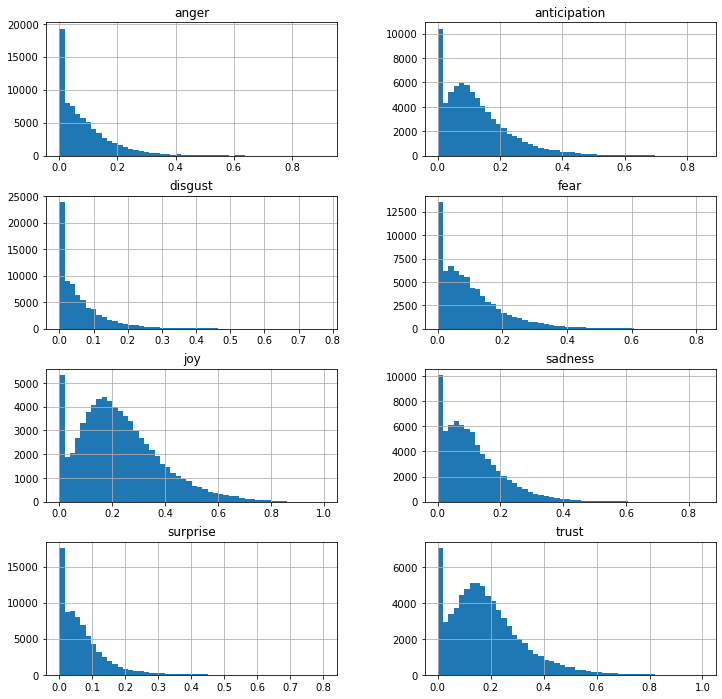

In [238]:
import pandas as pd

all_songs_emotions = pd.read_csv('data/songs_emotions.csv', index_col=0)

pd.DataFrame(all_songs_emotions).hist(layout=(4,2), figsize=[12, 12], bins=50)

Let's visualize all features, one pair at a time, to find out how much (if any) they are correlated:

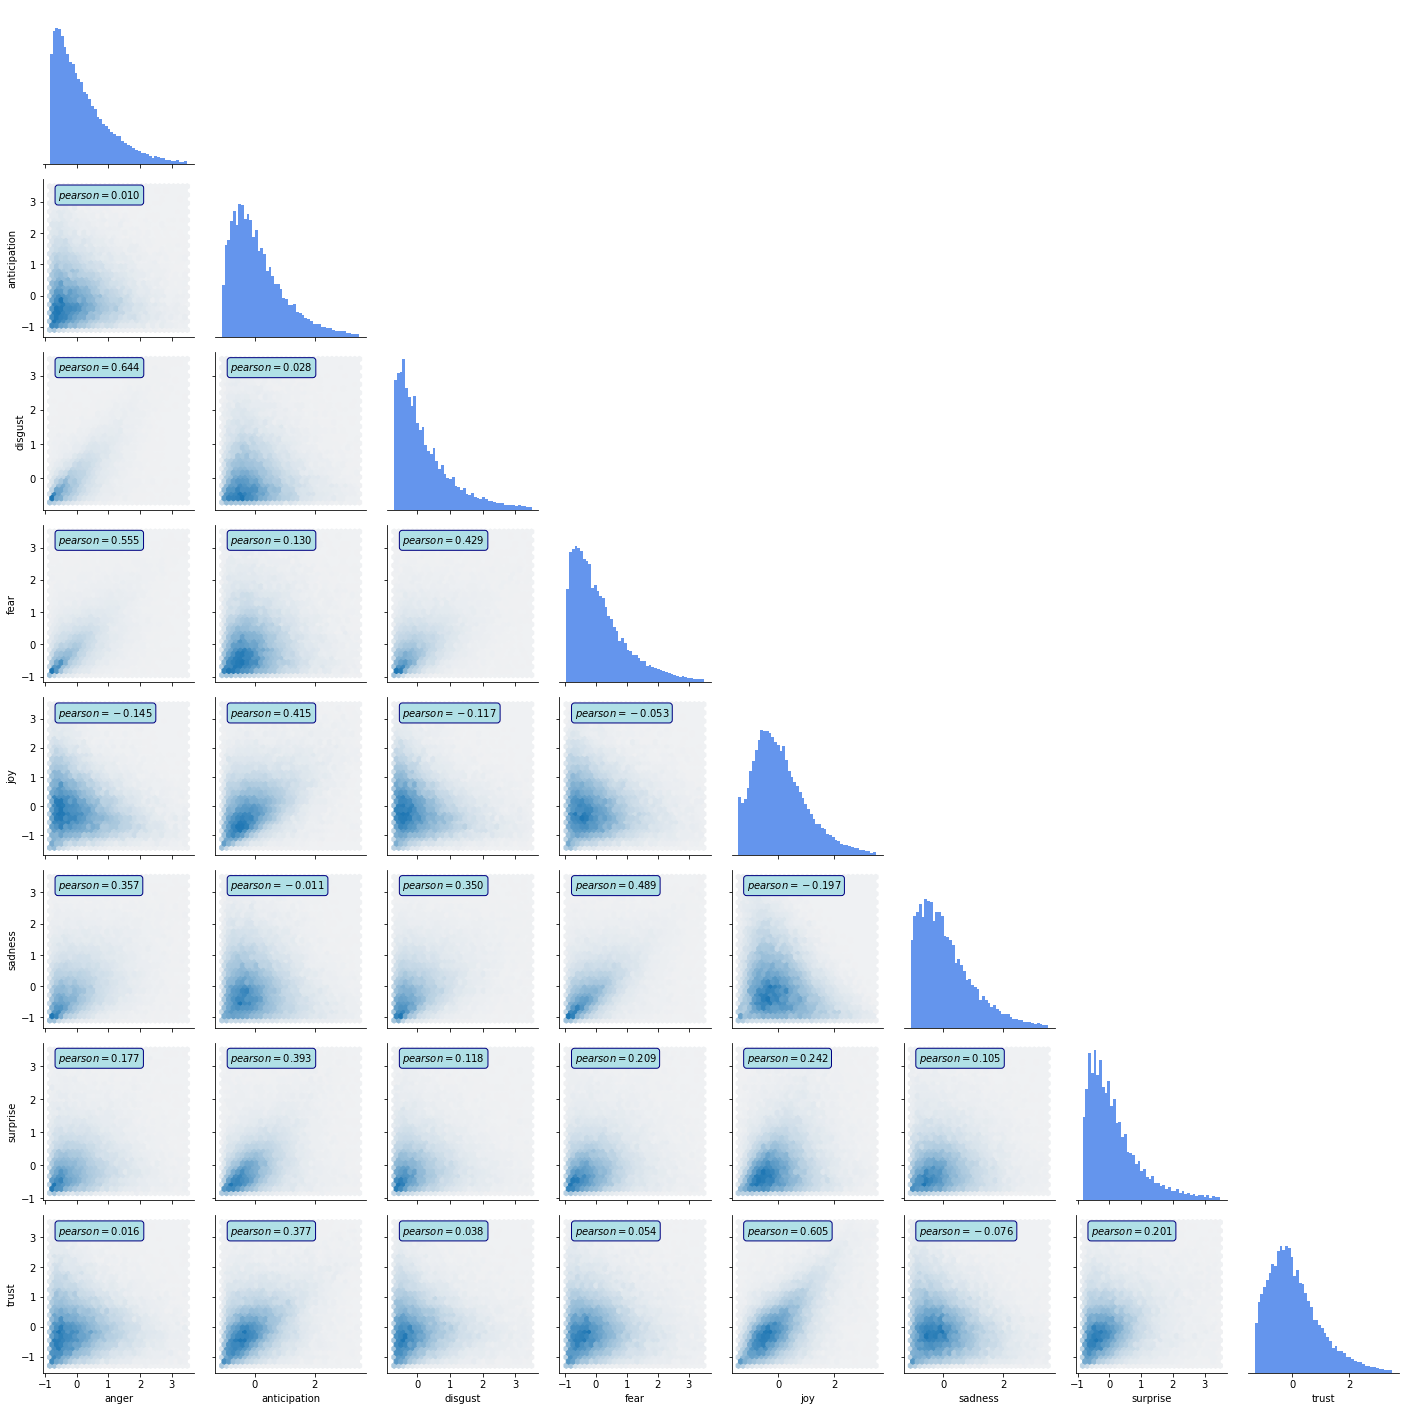

In [340]:
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def hide_current_axis(*args, **kwargs):
    plt.gca().set_visible(False)

def jointplot_hex(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    xy_df = pd.concat([x, y], axis=1)
    nonzero_cells_filter = (xy_df > 0.007)
    xy_df = pd.DataFrame(zscore(xy_df), columns=[x.name, y.name], index=x.index)
    outliers_filter = nonzero_cells_filter & (np.abs(xy_df) < 3.5)
    xy_df = xy_df[outliers_filter.iloc[:,0] & outliers_filter.iloc[:,1]]

    pearson = stats.pearsonr(xy_df.iloc[:,0], xy_df.iloc[:,1])[0]

    ax = plt.gca()
    plt.hexbin(xy_df.iloc[:,0], xy_df.iloc[:,1], cmap=cmap, gridsize=30, **kwargs)
    plt.annotate(f'$pearson = {pearson:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

def filtered_hist(x, **kwargs):
    nonzero_cells_filter = (x > 0.007)
    x = pd.Series(zscore(x), name=x.name, index=x.index)
    outliers_filter = nonzero_cells_filter & (np.abs(x) < 3.5)
    x = x[outliers_filter]
    plt.hist(x=x, bins=50, **kwargs)

all_songs_emotions = pd.read_csv('data/songs_emotions.csv', index_col=0)

# For our purpose, an outlier is a value that is more than 3 standard deviations from the mean
g = sns.PairGrid(data=all_songs_emotions, corner=True)
g.map_lower(jointplot_hex)
g.map_upper(hide_current_axis)
g.map_diag(filtered_hist, color='cornflowerblue')


We can see a moderate correlation in two pairs of features:
* anger-disgust - 0.644
* joy-trust - 0.605

We may consider omitting one feature out of each pair as a dimensionality reduction if needed

#### Limitations

As large and exhaustive as our lexicons are, the entire English vocabulary, even just the relatively common and generally used part of it is much larger. Many emotional words will not be detected when using the lexicons alone. Many other words might have multiple meanings and be misunderstood, and others were written differently their dictionary form (like cryin' instead of crying).

Moreover, VADER analyzer is only based on scoring unigrams and some bigrams: single sentimental words and sometimes negatives/boosters that go along with them and increase/reduce/negate their intensity. It might completely ignore phrases and any other meaningful word combinations.

Perhaps we can combine deep learning with our analyzers in order to tackle these issues.

### Topic Model

Besides emotions, songs' lyrics talk about plenty of subjects. These subjects can be related to sub-emotions, or they can be completely neutral. We want to find the most common and significant topics in our entire songs corpus, and find out to which topic(s) belongs each song.

A topic model is a generative model that intends to discover underlying topics in a collection of documents and each documents’ assumed closeness to this topic. A popular and well-established Topic Modeling algorithm is Latent Dirichlet Allocation (LDA), which is a probabilistic generative model that builds on the assumption that every document in a literature corpus is a mixture of latent topics and each of these topics themselves is a probability distribution over words.

By using the topic model on our songs lyrics, we may be able to identify common topics/themes in our songs and cluster songs based on these topics.

We'll do some necessary preprocessing first.

#### Filtering non-English songs

**Note**: *A single topic model is suited for a single language. All the tools that we use can easily be used on different languages - they are not specific to English.*

In [2215]:
from langdetect import detect_langs

all_lyrics_lang = pd.Series({tr_id: detect_langs(lyric)[0] for tr_id, lyric in all_lyrics_series.items()})
all_lyrics_series = all_lyrics_series[[l.lang == 'en' and l.prob >=0.95 for l in all_lyrics_lang]]
all_lyrics_series.to_pickle('all_lyrics_series.pkl')

#### Lyric Tokenization

In [2129]:
from nltk.tokenize import RegexpTokenizer

# Filter out numbers and words shorter than 3 characters
tokenizer = RegexpTokenizer(r'[a-zA-Z’‘\']{3,}')
# replace the popular "n'" suffixes with "ng" and "'cause" with "because" for better words recognition
all_lyrics_tokenized = [[re.sub(r"n'$", "ng", re.sub(r"^'cause$", "because", re.sub(r'[‘’]', "'", token))) 
        for token in tokenizer.tokenize(lyric.lower())] 
    for lyric in all_lyrics_series]

#### Token Lemmatization and removing Stop Words
* Lemmatization package was chosen using an efficiency comparison and the comparison done [here](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [2134]:
import treetaggerwrapper as ttpw
import spacy.lang.en
from vaderSentiment.vaderSentiment import NEGATE, BOOSTER_DICT
import pandas as pd

tagger = ttpw.TreeTagger(TAGLANG='en')
# We add some more special stopwords, common in songs
lyrics_stop_words = ['ooh','yeah', 'yes', 'hey', 'whoa' 'woah', 'ohh', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah', 'til', 'till']

# This time we don't need negation and booster words
topics_stopwords = spacy.lang.en.STOP_WORDS.union(NEGATE, BOOSTER_DICT.keys(), lyrics_stop_words)

for idx, song in enumerate(all_lyrics_tokenized):
    all_lyrics_tokenized[idx] = [token for token in [t.split('\t')[-1] for t in tagger.tag_text(song)] 
        if token not in topics_stopwords and len(token) > 2] 

pd.Series(all_lyrics_tokenized).to_pickle('all_lyrics_tokenized.pkl')

#### Dictionary Creation and occurrence-based Filtering

In order to perform Latent Dirichlet Allocation, we use the popular and well-established Python library gensim, which requires a dictionary representation of the documents. This means all tokens are mapped to a unique ID, which reduces the overall dimensionality of a literature corpus. In addition, we filter out tokens that occur in less than 60 songs, as well as tokens that occur in more than 80% of songs.

In [2]:
from gensim.corpora import Dictionary

dictionary = Dictionary(all_lyrics_tokenized)
dictionary.filter_extremes(no_below = 60, no_above = 0.8)
dictionary.save('lyrics_for_topics_dict.dct')
dictionary.save_as_text('lyrics_for_topics_dict.txt')

#### Bag-of-Words and Index to Dictionary Conversion

Each song (as of now a list of tokens) is converted into the bag-of-words format, which only stores the unique token ID and its count for each song.

In [2]:
gensim_corpus = [dictionary.doc2bow(song) for song in all_lyrics_tokenized]

#### Choosing LDA implementation

Now our data is finally ready for topic extraction using LDA.

LDA is implemented in two major libraries: Scikit-learn and Gensim. We'll compare their results and runtime with default parameters (no optimization).

In [40]:
%%time
from gensim.models import LdaMulticore

initial_gensim_model = LdaMulticore(corpus=gensim_corpus, num_topics=6, id2word=dictionary, random_state=28)

Wall time: 38.1 s


In [13]:
# sklearn's LDA requires similar preprocessing to what we did earlier with gensim. 
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(preprocessor=lambda doc: doc,
                                tokenizer=lambda doc: doc,
                                token_pattern = r'[a-zA-Z’‘\']{3,}',
                                max_df = 0.8, 
                                min_df = 60)

dtm_tf = tf_vectorizer.fit_transform(all_lyrics_tokenized)


In [42]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

# Set same parameters as in Gensim's LDA
lda_tf = LatentDirichletAllocation(n_components=6, learning_method='online', 
                                   learning_decay=initial_gensim_model.decay, 
                                   n_jobs=-1,
                                   max_iter=initial_gensim_model.iterations, 
                                   batch_size=initial_gensim_model.chunksize,
                                   learning_offset=initial_gensim_model.offset,
                                   evaluate_every=initial_gensim_model.eval_every,
                                   random_state=28)
lda_tf.fit(dtm_tf)

Wall time: 11min 5s


LatentDirichletAllocation(batch_size=2000, evaluate_every=10,
                          learning_decay=0.5, learning_method='online',
                          learning_offset=1.0, max_iter=50, n_components=6,
                          n_jobs=-1, random_state=28)

**Gensim's Topics:**

In [45]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

vis_data = gensimvis.prepare(initial_gensim_model, gensim_corpus, dictionary)
pyLDAvis.save_html(vis_data, f'./Lyrics_initial_gensim.html')
pyLDAvis.display(vis_data)

**Scikit-learn's Topics:**

In [43]:
import pyLDAvis.sklearn as skvis

vis_data = skvis.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.save_html(vis_data, f'./Lyrics_initial_sklearn.html')
pyLDAvis.display(vis_data)

We can see that the results are quite similar, but the runtime of Gensim is much smaller.

We can summarize the results in the following table, consisting of similar topics between the two according to the visualizations above:

| Topic Label(s)        | Gensim Topic Num | Scikit-learn Topic Num |
|-----------------------|------------------|------------------------|
| Religious, Spiritual  | 5                | 4                      |
| Explicit, Violent     | 1                | 2                      |
| Light Romance, Passion| 2                | 5                      |
| Pain, Loss, Fear      | 4                | absent                 |
| Nature                | absent           | 6                      |
| Love                  | 6                | ~5,1                   |
| Family                | ~3               | 3                      |

It looks like both models need optimization. 

Since the results of both of them are comparable, we'll continue with Gensim because of its runtime and since Gensim has a built-in evaluation method called *Coherence* (which we'll expand upon later on).

#### Determining the number of topics and hyperparameters tuning

Another extra step needs to be taken to optimize results and that is identifying an optimum amount of topics (k), as well as the hyperparameters: Document-Topic Density (*α*) and Word-Topic Density (*η*) parameters. 

LDA model clusters our songs into topics, but it requires a number of topics parameter - k. If k is too small, our topics will be too general, contain too many words, and the songs that share them will not actually be similar. However, giving a k which is too large will yield fractions of topics, repetition of certain words in many of them, and not enough similar songs for each song.

*alpha* parameter determines how many topics will be extracted from each song ("document"), and *eta* determines how many words are included in each topic. Both of these parameters can also impact our results significantly.

The mathematical representation of how good a topic is called Topic Coherence. it means the degree of semantic similarity between high scoring words in the topic (detailed information [here](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf)). There are a few measures to calculate it, we chose NPMI over the default C_V for reliability reasons (see discussion [here](https://github.com/dice-group/Palmetto/issues/12)). 

We will create multiple LDA models for our data, with different parameter values, compute their topics' average coherence values, and find the combination which gives us the maximum value.

In [50]:
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

def build_lda_model(k, alpha='symmetric', eta='symmetric'):
    # Generate an LDA model for the tested parameters values
    return LdaMulticore(corpus=gensim_corpus, num_topics=k, id2word=dictionary, alpha=alpha, eta=eta,
        passes=10, iterations=400, chunksize=1000, random_state=28)

def get_coherence(model, measure='c_npmi'):
    # Calculate topics coherence for the given model
    coherencemodel = CoherenceModel(model=model, texts=all_lyrics_tokenized, dictionary=dictionary, 
        window_size=100, coherence=measure)
    return coherencemodel.get_coherence()

We'll tune k, a and then b separately:

<AxesSubplot:xlabel='k', ylabel='coherence'>

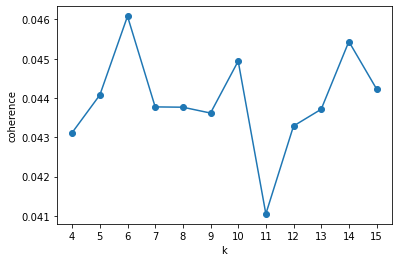

In [4]:
import pandas as pd

lda_model_for_k = {}
coherences = pd.Series(dtype='float64')

k_test_range = range(4, 16)
for i in k_test_range:
    if i not in lda_model_for_k.keys():
        lda_model_for_k[i] = build_lda_model(i, alpha=0.4, eta=0.1)
        lda_model_for_k[i].save(f'./lda_models/a04b01/k{i}')
    if i not in coherences.keys():
        coherences.at[i] = get_coherence(lda_model_for_k[i])

optimal_k = coherences.idxmax()
coherences.to_pickle('./lda_models/a04b01/coherences.pkl')
coherences.plot(xticks=k_test_range, xlabel='k', ylabel='coherence', marker='o')

<AxesSubplot:xlabel='a', ylabel='coherence'>

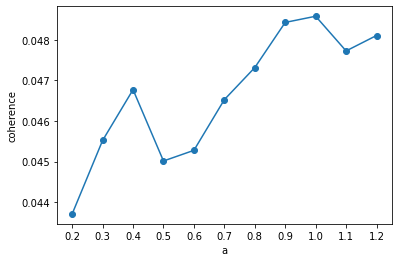

In [5]:
import numpy as np

lda_model_for_a = {}
coherences = pd.Series(dtype='float64')

a_test_range = np.round(np.arange(0.2, 1.3, 0.1), 1)
for i in a_test_range:
    if i not in lda_model_for_a.keys():
        lda_model_for_a[i] = build_lda_model(optimal_k, alpha=i, eta=0.1)
        lda_model_for_a[i].save(f'./lda_models/k6b01/a{i}')
    if i not in coherences.keys():
        coherences.at[i] = get_coherence(lda_model_for_a[i])

optimal_a = coherences.idxmax()
coherences.to_pickle('./lda_models/k6b01/coherences.pkl')
coherences.plot(xticks=a_test_range, xlabel='a', ylabel='coherence', marker='o')

<AxesSubplot:xlabel='b', ylabel='coherence'>

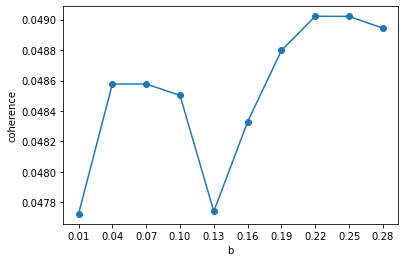

In [7]:
lda_model_for_b = {}
coherences = pd.Series(dtype='float64')

b_test_range = np.round(np.arange(0.01, 0.3, 0.03), 2)
for i in b_test_range:
    if i not in lda_model_for_b.keys():
        lda_model_for_b[i] = build_lda_model(optimal_k, optimal_a, eta=i)
        lda_model_for_b[i].save(f'./lda_models/k6a1/b{i}')
    if i not in coherences.keys():
        coherences.at[i] = get_coherence(lda_model_for_b[i])

optimal_model = lda_model_for_b[coherences.idxmax()]
coherences.to_pickle('./lda_models/k6a1/coherences.pkl')
coherences.plot(xticks=b_test_range, xlabel='b', ylabel='coherence', marker='o')

Now that we have found the model that yields the most coherent topics, let's visualize the inferred topics:

In [5]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# optimal_model = LdaMulticore.load('./lda_models/k6a1/b0.22')

vis_data = gensimvis.prepare(optimal_model, gensim_corpus, dictionary)
pyLDAvis.save_html(vis_data, f'./Lyrics_LDA_optimal.html')
pyLDAvis.display(vis_data)

These topics can be summarized as:

| Topic Num (in pyLDAvis) | Topic Labels           |
|-------------------------|------------------------|
| 1                       | Explicit, Violent      |
| 2                       | Pain, Loss, Anxiety    |
| 3                       | Light Romance, Passion |
| 4                       | Love, Trust            |
| 5                       | Dance, Party           |
| 6                       | Spiritual, Natural     |

Looks much better than the topics we started with.

With these topics we can cluster songs that are similar in their content.

Using the function `get_document_topics` of Gensim's LDA model, we can get topic probabilities list for each song (the probability that it belongs to each of the extracted topics). These can serve as numeric features for our purpose.

## Summary
1. We decided to research the benefit of machine learning in the field of music recommendation.
2. We introduced the two main concepts of recommendation systems: collaborative filtering and content-based filtering.
3. We raised an hypothesis that content-based filtering (analyzing audio features & lyrics) can be useful for recommendation/prediction models and can tackle inherent issues that occur in collaborative filtering. Extracting data from lyrics and audio features is also much more interesting in terms of data analysis and ML than collaborative filtering. Therefore, we decided to emphasize on it.
4. We fetched data (by scraping and by API calls) from various sources (Spotify playlists, audio features and lyrics of songs in the given playlists).
5. We analyzed lyrics with two different NLP techniques:
   1. Emotion Recognition - using emotional terms lexicons and VADER.
   2. Topic Modeling - using LDA algorithm.

## Future plans
1. Fetching audio features.
2. Perhaps implement simple Collaborative Filtering for comparison or for improving results.
3. In emotion recognition we created a model that can give emotion scores for each song, but it's only based on its lexicons. Perhaps we can train a model with some of these scores in order to score all the rest of the songs, so that it may find other emotional words that are not included in the lexicons, and yield us more accurate scores.
4. The main plan: 
   1. Gather all numeric features for each song: audio features, emotion scores and topics relevance. 
   2. Using a machine-learning model (probably unsupervised or a combination with a supervised ANN), make clusters of similar songs based on the features. 
   3. Build a predictor that returns similar songs for each user based on the created clusters and his/her given playlist.
   4. For comparison, we can take each group of features (audio, emotions, topics) separately and compare their results. According to these results we can give different weights to each features group when we combine them (lower weight to less-important features), and thereby finding the optimal model.